In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
import uuid

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nl

True

## Load the dataset

In [3]:
df = pd.read_csv("British_airways_reviews.csv")
df.head()

,title,date,text
0,"""substituted clotted cream for butter""",10th July 2025,✅Trip Verified| Check in and security were qui...
1,“service was inconsistent”,5th July 2025,Not Verified| I recently flew business class w...
2,“consistently incorrect information”,4th July 2025,Not Verified| They lost my bag and took 20 day...
3,"""I was very disappointed""",23rd June 2025,Not Verified| Paid to upgrade to business clas...
4,“great service from the crew”,23rd June 2025,Not Verified| Decided to use point to upgrade ...


In [4]:
# Rename the columns of the dataset 
df.rename(columns = {'title':'Title', 'date':'Date', 'text':'Reviews'}, inplace = True)

In [5]:
df.head()

,Title,Date,Reviews
0,"""substituted clotted cream for butter""",10th July 2025,✅Trip Verified| Check in and security were qui...
1,“service was inconsistent”,5th July 2025,Not Verified| I recently flew business class w...
2,“consistently incorrect information”,4th July 2025,Not Verified| They lost my bag and took 20 day...
3,"""I was very disappointed""",23rd June 2025,Not Verified| Paid to upgrade to business clas...
4,“great service from the crew”,23rd June 2025,Not Verified| Decided to use point to upgrade ...


In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1000 non-null   object
 1   Date     1000 non-null   object
 2   Reviews  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


## Clean the reviews

In [8]:
# Remove | from reviews column
df['Reviews'] = df.Reviews.str.split('|', expand = True)[1]

In [9]:
df.head()

,Title,Date,Reviews
0,"""substituted clotted cream for butter""",10th July 2025,Check in and security were quick and efficien...
1,“service was inconsistent”,5th July 2025,I recently flew business class with British A...
2,“consistently incorrect information”,4th July 2025,They lost my bag and took 20 days to find it....
3,"""I was very disappointed""",23rd June 2025,Paid to upgrade to business class as family o...
4,“great service from the crew”,23rd June 2025,Decided to use point to upgrade to business a...


### Drop the column 'Date'

In [10]:
df = df.drop('Date', axis =1)

In [11]:
df

,Title,Reviews
0,"""substituted clotted cream for butter""",Check in and security were quick and efficien...
1,“service was inconsistent”,I recently flew business class with British A...
2,“consistently incorrect information”,They lost my bag and took 20 days to find it....
3,"""I was very disappointed""",Paid to upgrade to business class as family o...
4,“great service from the crew”,Decided to use point to upgrade to business a...
...,...,...
995,"""such a pleasant experience""",For a long time I have avoided taking British...
996,"""Another pleasant flight""",Austin to London. Another pleasant flight on ...
997,"""Better than I was expecting""",London to Kuala Lumpur. Better than I was exp...
998,"""zero customer service""",I wish I could give a zero. I was booked on a...


### Cleaning the text

In [12]:
# Define a function to clean the text 
def clean(text):

    # Remove all special characters and numericals 
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text 


df['Cleaned_reviews'] = df['Reviews'].apply(clean)
df.head()

,Title,Reviews,Cleaned_reviews
0,"""substituted clotted cream for butter""",Check in and security were quick and efficien...,Check in and security were quick and efficien...
1,“service was inconsistent”,I recently flew business class with British A...,I recently flew business class with British A...
2,“consistently incorrect information”,They lost my bag and took 20 days to find it....,They lost my bag and took days to find it The...
3,"""I was very disappointed""",Paid to upgrade to business class as family o...,Paid to upgrade to business class as family o...
4,“great service from the crew”,Decided to use point to upgrade to business a...,Decided to use point to upgrade to business a...


## POS Tagging and Lemmatization 

### POS Tagging

In [13]:
pos_dict = {'J':wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}
stop_words = set(stopwords.words('english'))


# Create a function for token stop POS
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in stop_words:
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [14]:
df['POS_tagged'] = df['Cleaned_reviews'].apply(token_stop_pos)

### Lemmatization

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()

In [16]:
# create a function of lemmatization 
def lemmatize(pos_data):
    lemma_rew = ""
    for word, pos in pos_data:
        if not pos:
            lemma = word
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew += " " + lemma
    return lemma_rew.strip()

In [17]:
df['Lemma'] = df['POS_tagged'].apply(lemmatize)

### Combine Title and Review 

In [18]:
# Handle missing values in both columns 
df['Title'] = df['Title'].fillna('')
df['Lemma'] = df['Lemma'].fillna('')
df['Combined_text'] = df['Title'] + ' ' + df['Lemma']

In [19]:
df.head()

,Title,Reviews,Cleaned_reviews,POS_tagged,Lemma,Combined_text
0,"""substituted clotted cream for butter""",Check in and security were quick and efficien...,Check in and security were quick and efficien...,"[(Check, n), (security, n), (quick, a), (effic...",Check security quick efficient Galleries North...,"""substituted clotted cream for butter"" Check s..."
1,“service was inconsistent”,I recently flew business class with British A...,I recently flew business class with British A...,"[(recently, r), (flew, v), (business, n), (cla...",recently fly business class British Airways mu...,“service was inconsistent” recently fly busine...
2,“consistently incorrect information”,They lost my bag and took 20 days to find it....,They lost my bag and took days to find it The...,"[(lost, v), (bag, n), (took, v), (days, n), (f...",lose bag take day find entire time customer se...,“consistently incorrect information” lose bag ...
3,"""I was very disappointed""",Paid to upgrade to business class as family o...,Paid to upgrade to business class as family o...,"[(Paid, v), (upgrade, v), (business, n), (clas...",Paid upgrade business class family disappointe...,"""I was very disappointed"" Paid upgrade busines..."
4,“great service from the crew”,Decided to use point to upgrade to business a...,Decided to use point to upgrade to business a...,"[(Decided, v), (use, v), (point, n), (upgrade,...",Decided use point upgrade business visit famil...,“great service from the crew” Decided use poin...


## Enhanced Sentiment Analysis 

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
# Create a function for the enhanced sentiment analysis 
def enhanced_sentiment_analysis(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']

    # Incorporate review length as a sentiment intensity modifier 
    word_count = len(text.split())
    length_modifier = min(1.0, word_count / 50) # Normalize impact of review length

    adjusted_compound = compound * (1 + 0.1 * length_modifier)

    if adjusted_compound >= 0.4:
        return 'Positive', scores, adjusted_compound
    elif adjusted_compound <= -0.1:
        return 'Negative', scores, adjusted_compound
    else:
        return 'Neutral', scores, adjusted_compound

In [22]:
df[['Sentiment', 'Vader_Scores', 'Adjusted_compound']] = df['Combined_text'].apply(lambda x: pd.Series(enhanced_sentiment_analysis(x)))

In [23]:
df.head()

,Title,Reviews,Cleaned_reviews,POS_tagged,Lemma,Combined_text,Sentiment,Vader_Scores,Adjusted_compound
0,"""substituted clotted cream for butter""",Check in and security were quick and efficien...,Check in and security were quick and efficien...,"[(Check, n), (security, n), (quick, a), (effic...",Check security quick efficient Galleries North...,"""substituted clotted cream for butter"" Check s...",Positive,"{'neg': 0.02, 'neu': 0.703, 'pos': 0.277, 'com...",1.075360
1,“service was inconsistent”,I recently flew business class with British A...,I recently flew business class with British A...,"[(recently, r), (flew, v), (business, n), (cla...",recently fly business class British Airways mu...,“service was inconsistent” recently fly busine...,Negative,"{'neg': 0.178, 'neu': 0.696, 'pos': 0.126, 'co...",-0.688380
2,“consistently incorrect information”,They lost my bag and took 20 days to find it....,They lost my bag and took days to find it The...,"[(lost, v), (bag, n), (took, v), (days, n), (f...",lose bag take day find entire time customer se...,“consistently incorrect information” lose bag ...,Negative,"{'neg': 0.212, 'neu': 0.651, 'pos': 0.137, 'co...",-0.507209
3,"""I was very disappointed""",Paid to upgrade to business class as family o...,Paid to upgrade to business class as family o...,"[(Paid, v), (upgrade, v), (business, n), (clas...",Paid upgrade business class family disappointe...,"""I was very disappointed"" Paid upgrade busines...",Neutral,"{'neg': 0.152, 'neu': 0.704, 'pos': 0.144, 'co...",0.086130
4,“great service from the crew”,Decided to use point to upgrade to business a...,Decided to use point to upgrade to business a...,"[(Decided, v), (use, v), (point, n), (upgrade,...",Decided use point upgrade business visit famil...,“great service from the crew” Decided use poin...,Positive,"{'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'comp...",1.043270


## Sentiment distribution plot 

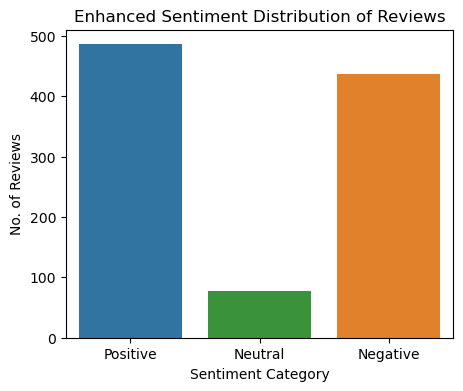

In [24]:
plt.figure(figsize = (5,4))
sns.countplot(df, x = 'Sentiment',hue = 'Sentiment', order = ['Positive', 'Neutral', 'Negative'], legend = False)
plt.title("Enhanced Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("No. of Reviews")
plt.show()

### Pie chart for sentiment distribution

In [25]:
sentiment_counts = df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = sns.color_palette('Set3', n_colors = len(labels))
explode = [0.1 if i == sentiment_counts.argmax() else 0 for i in range(len(labels))] 

In [26]:
sentiment_counts

Sentiment
Positive    486
Negative    437
Neutral      77
Name: count, dtype: int64

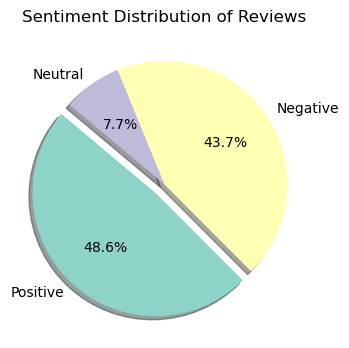

In [27]:
# plot the pie chart 
plt.figure(figsize = (5, 4))
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%",startangle = 140, explode = explode, shadow = True)
plt.title("Sentiment Distribution of Reviews")
plt.show()

## WordClouds with Sentiment Intensity

In [28]:
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Combined_text'])
    mean_compound = df[df['Sentiment'] == sentiment]['Adjusted_compound'].mean()

    # word cloud size 
    wc_width = 800 + int(mean_compound * 200)
    wc_height = 400 + int(mean_compound * 100)

    
wordcloud = WordCloud(width = wc_width, height = wc_height, background_color = 'white', stopwords = stop_words, colormap = 'viridis', max_words = 200).generate(text)

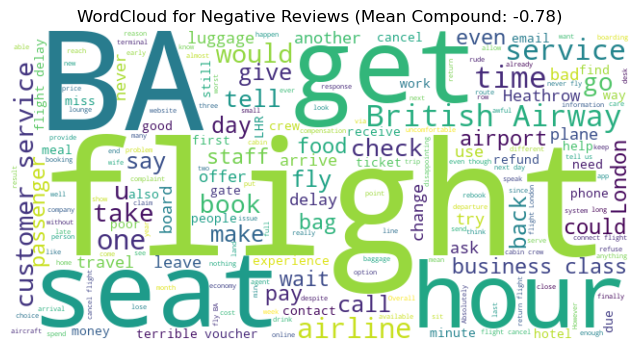

In [29]:
# Plot a wordcloud 
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title(f"WordCloud for {sentiment} Reviews (Mean Compound: {mean_compound:.2f})")
plt.show()

## Review Length Analysis with Sentiment 

In [30]:
df['Review_length'] = df['Combined_text'].apply(lambda x: len(x.split()))

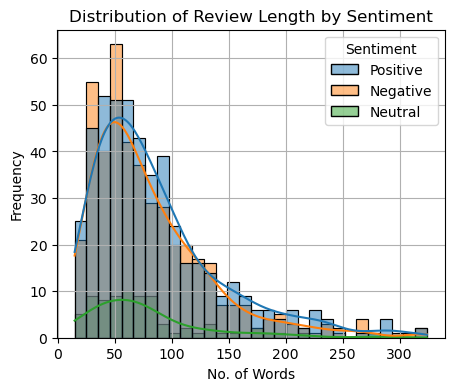

In [31]:
plt.figure(figsize = (5,4))
sns.histplot(df, x = 'Review_length', hue = 'Sentiment', bins = 30, kde = True)
plt.title("Distribution of Review Length by Sentiment")
plt.xlabel("No. of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Enhanced Bigrams Analysis with Context

- A bigram is a pair of two consecutive words that appear together in a sentence or text.

**Example**:
Sentence: "The food was tasty"
Bigrams: ("The", "food"), ("food", "was"), ("was", "tasty")

It helps capture the relationship between words and gives more context than analyzing single words alone.

In [32]:
# Create a function for the bigram analysis
def bigram_analysis(sentiment_label):
    vectorizer = CountVectorizer(ngram_range = (2,2),stop_words  = 'english', max_features = 20)
    reviews = df[df['Sentiment'] == sentiment_label]['Combined_text']

    X = vectorizer.fit_transform(reviews)
    
    bigrams = vectorizer.get_feature_names_out()
    counts = X.toarray().sum(axis = 0)

    # Calculate average sentiment score per bigram
    bigram_sentiments = []
    for bigram in bigrams:
        bigram_reviews = df[df['Combined_text'].str.contains(bigram, case = False)]['Adjusted_compound']
        bigram_sentiments.append(bigram_reviews.mean() if not bigram_reviews.empty else 0)

    freqs = pd.DataFrame({
        'Bigram' : bigrams,
        'Count' : counts,
        'Avg_Sentiment' : bigram_sentiments
    }).sort_values(by = 'Count', ascending = False)

    plt.figure(figsize=(5,4))
    sns.barplot(freqs, x='Count', y='Bigram', hue='Avg_Sentiment', palette='coolwarm')
    plt.title(f"Top Bigrams in {sentiment_label} Reviews with Sentiment Intensity")
    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    plt.show()
    
    return freqs

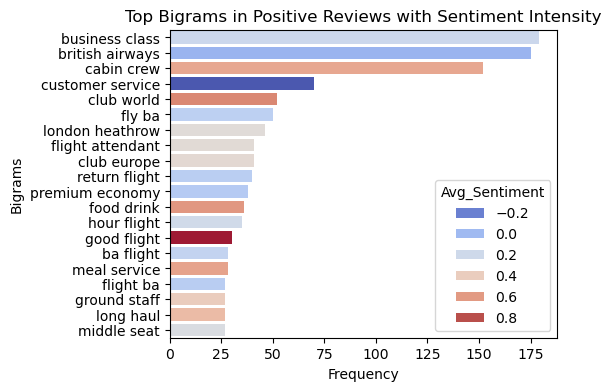

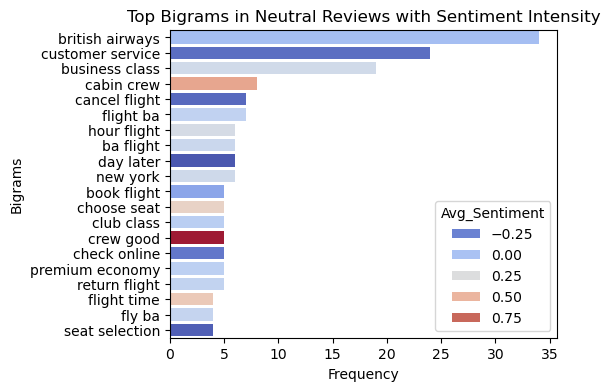

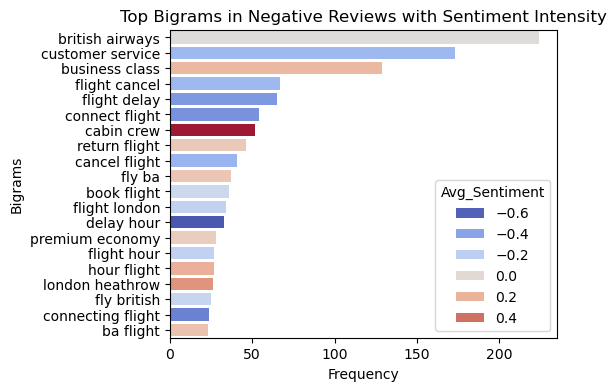

In [33]:
Positive_bigrams = bigram_analysis('Positive')
Neutral_bigrams = bigram_analysis('Neutral')
Negative_bigrams = bigram_analysis('Negative')

In [34]:
Positive_bigrams

,Bigram,Count,Avg_Sentiment
2,business class,179,0.178448
1,british airways,175,-0.020716
3,cabin crew,152,0.557888
6,customer service,70,-0.318056
5,club world,52,0.655146
9,fly ba,50,0.118694
14,london heathrow,46,0.302383
7,flight attendant,41,0.310269
4,club europe,41,0.326891
19,return flight,40,0.103792


In [35]:
Negative_bigrams

,Bigram,Count,Avg_Sentiment
2,british airways,224,-0.020716
8,customer service,173,-0.318056
3,business class,129,0.178448
10,flight cancel,67,-0.320198
11,flight delay,65,-0.432545
6,connect flight,54,-0.455121
4,cabin crew,52,0.557888
19,return flight,46,0.103792
5,cancel flight,41,-0.331711
14,fly ba,37,0.118694


In [36]:
Neutral_bigrams

,Bigram,Count,Avg_Sentiment
2,british airways,34,-0.020716
10,customer service,24,-0.318056
3,business class,19,0.178448
4,cabin crew,8,0.557888
5,cancel flight,7,-0.331711
12,flight ba,7,0.100166
15,hour flight,6,0.208999
0,ba flight,6,0.141272
11,day later,6,-0.385119
16,new york,6,0.166170
